## 🏠 Boston Housing Price Prediction — Model Comparison
In this project, we predict median house prices using **Linear Regression**, **Random Forest**,  
and **Gradient Boosting** models.  

We aim to compare their performance based on **R² Score** and **Mean Squared Error (MSE)**  
to determine which model best captures the data relationships.


In [22]:
# ------------------------------------------------------------
# 🏠 Boston Housing Price Prediction (Advanced Model Comparison)
# ------------------------------------------------------------
# Objective:
#   Predict housing prices using multiple regression algorithms
#   and compare their performance.
#
# Dataset:
#   Boston Housing dataset — contains various socioeconomic
#   and structural features influencing house prices, such as:
#     - CRIM: Crime rate per capita
#     - RM: Average number of rooms per dwelling
#     - LSTAT: % of lower-status population
#     - PTRATIO: Pupil-teacher ratio
#     - TAX: Property tax rate, etc.
#
# Goal:
#   Evaluate and compare:
#     1️⃣ Linear Regression
#     2️⃣ Random Forest Regressor
#     3️⃣ Gradient Boosting Regressor
# ------------------------------------------------------------

# 📚 Importing essential Python libraries for data analysis and ML
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical computations
import matplotlib.pyplot as plt  # For data visualization (basic plotting)
import seaborn as sns            # For advanced, aesthetic data visualization

# ⚙️ Importing scikit-learn modules for model building and evaluation
from sklearn.model_selection import train_test_split  # To split dataset into training/testing sets
from sklearn.linear_model import LinearRegression     # Linear Regression (baseline model)

# 🧠 Import Advanced Ensemble Models
# Random Forest → Bagging technique: builds many trees independently and averages results
# Gradient Boosting → Boosting technique: builds trees sequentially, improving on previous errors
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 📏 Import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score  # To assess model accuracy and fit quality

# ⚠️ Suppress unnecessary warnings for cleaner notebook output
import warnings
warnings.filterwarnings("ignore")


In [5]:
# ------------------------------------------------------------
# 📂 Step 1: Load the Dataset
# ------------------------------------------------------------
# The dataset 'boston_housing.csv' contains housing data such as:
# - Average number of rooms per dwelling
# - Crime rate
# - Property tax rate
# - Pupil-teacher ratio
# - And the target variable: median home value
# ------------------------------------------------------------

# 📥 Load the CSV file into a pandas DataFrame
df = pd.read_csv('boston_housing.csv')

# 👀 Display the first few rows to verify successful loading
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
# ------------------------------------------------------------
# 🧾 Step 2: Explore Dataset Information
# ------------------------------------------------------------
# The .info() method provides a concise summary of the DataFrame.
# It shows:
# - Number of rows and columns
# - Column names and data types (int, float, object, etc.)
# - Count of non-null (non-missing) values per column
# This helps identify if any data cleaning or type conversion is needed.
# ------------------------------------------------------------

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 🔥 Correlation Heatmap
A correlation heatmap shows how different features are related to each other.  
We use it to identify which factors most influence house prices.


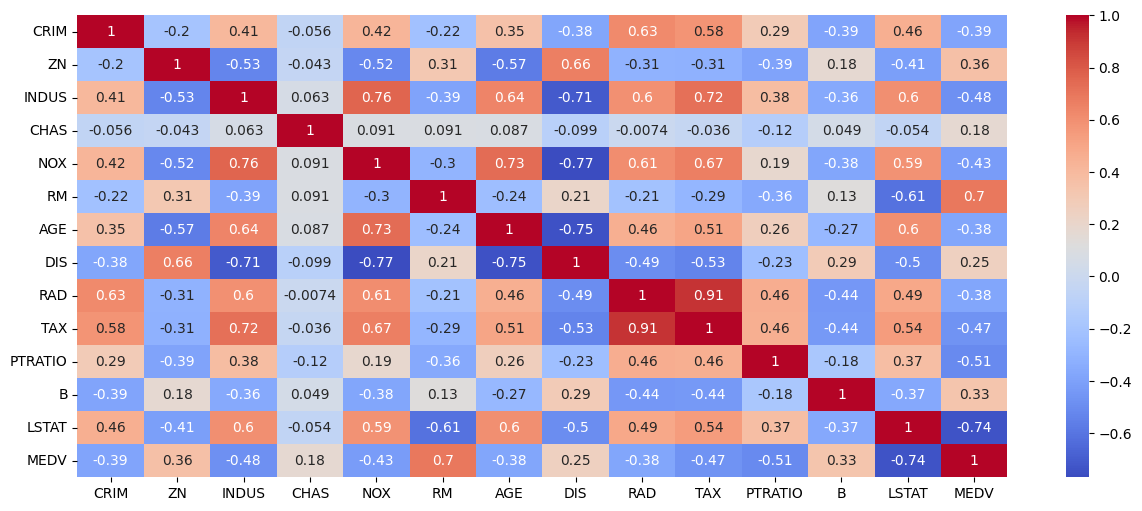

In [8]:
# ------------------------------------------------------------
# 📈 Step 3: Correlation Heatmap
# ------------------------------------------------------------
# A heatmap helps visualize the correlation between all numerical
# features in the dataset. Correlation values range between:
#  -1 → Perfect negative correlation
#   0 → No correlation
#  +1 → Perfect positive correlation
#
# High correlation with the target variable (e.g., MEDV) suggests
# that the feature strongly influences house prices.
# ------------------------------------------------------------

# Set figure size for better readability
plt.figure(figsize=(15, 6))

# Plot the correlation heatmap using seaborn
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()


### 📦 Outlier Detection
Boxplots are used to visualize the distribution of data and detect outliers in each feature.  
Outliers can impact model performance, so they should be checked before training.


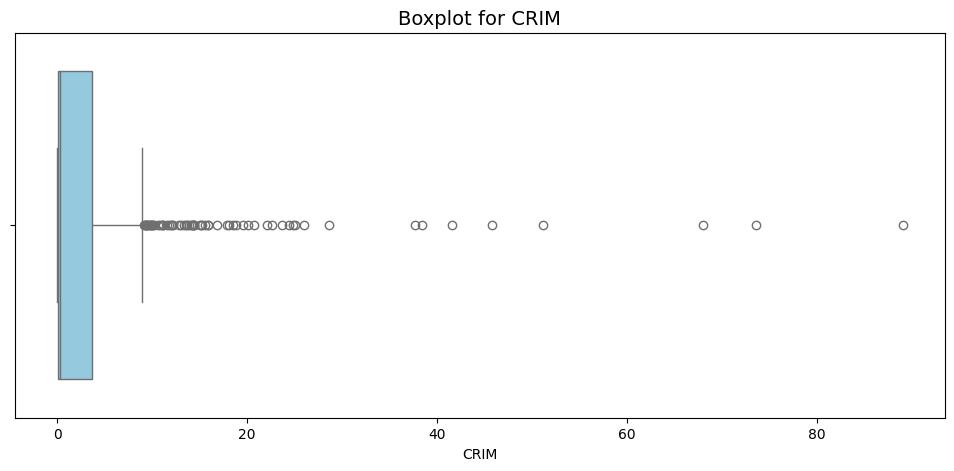

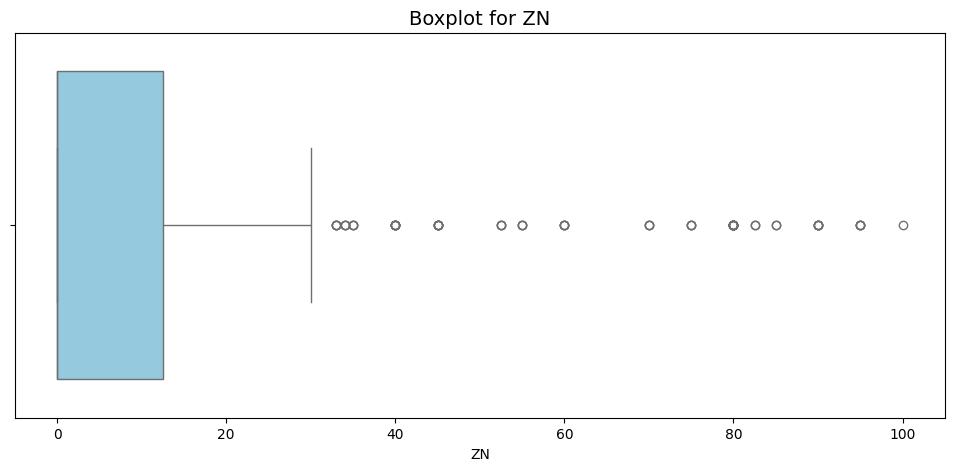

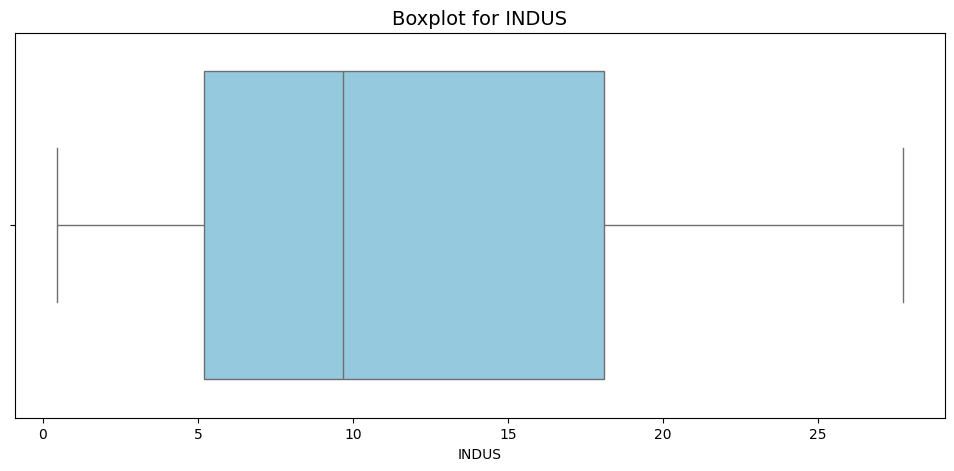

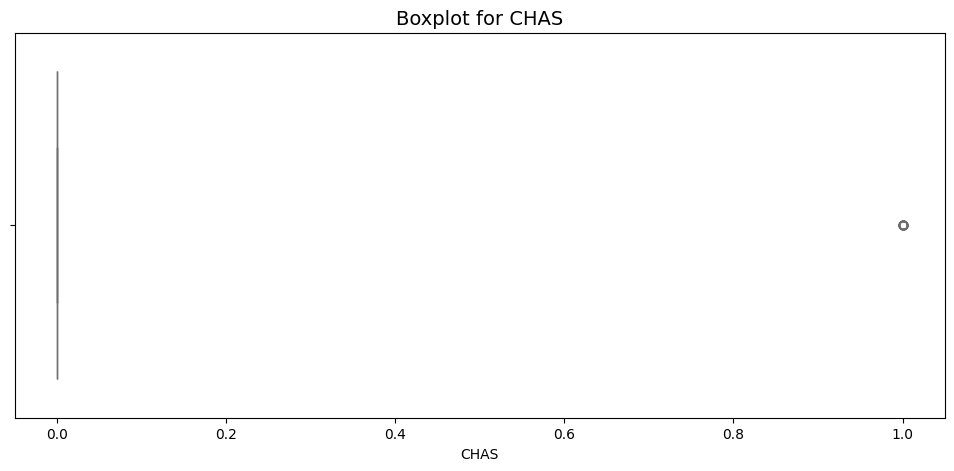

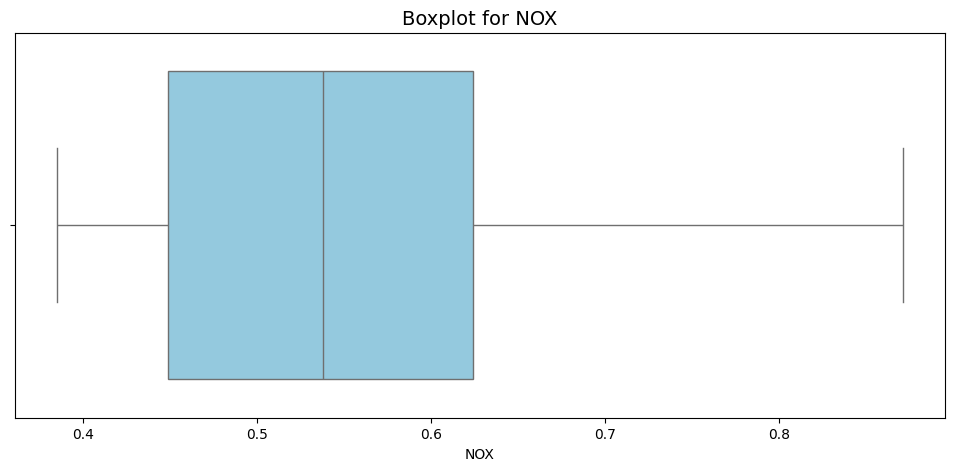

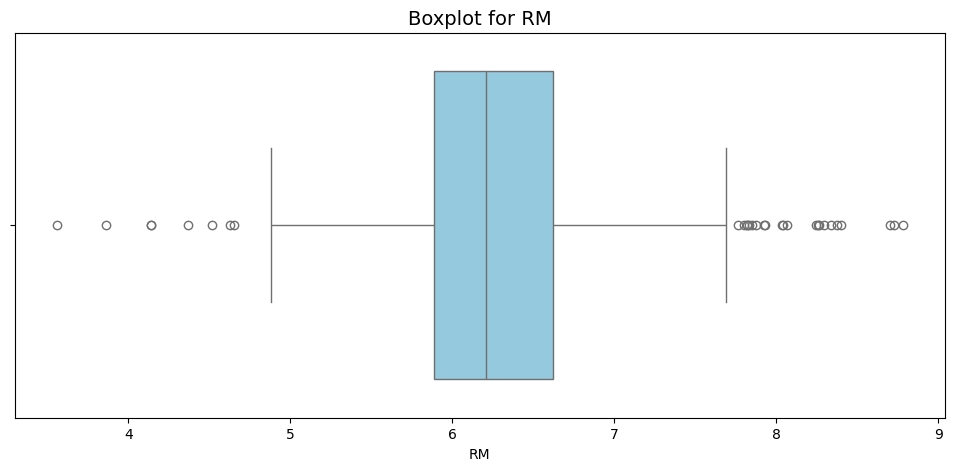

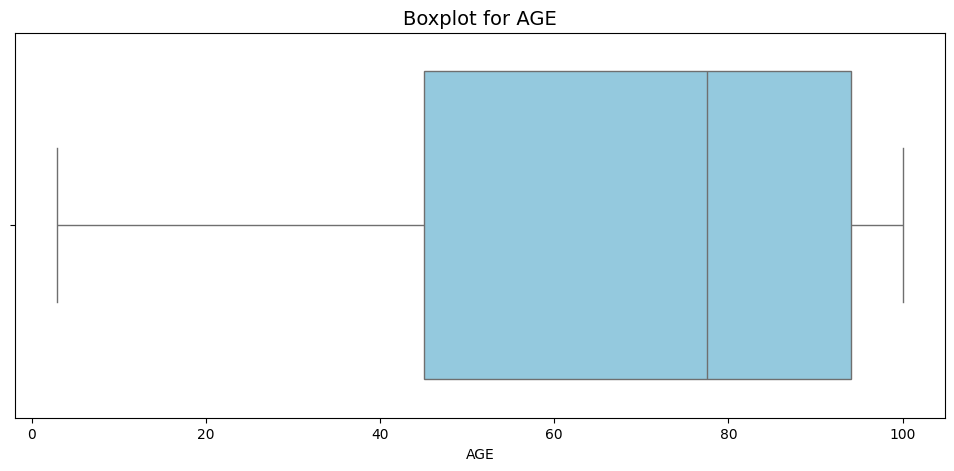

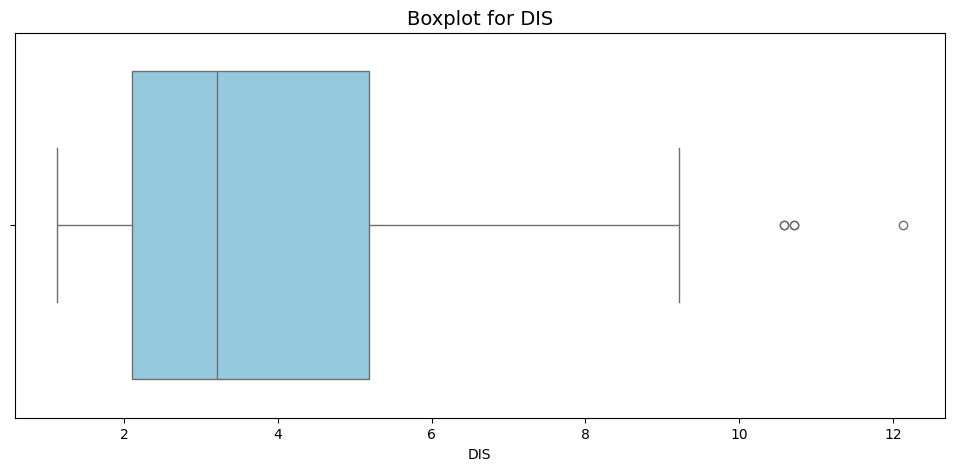

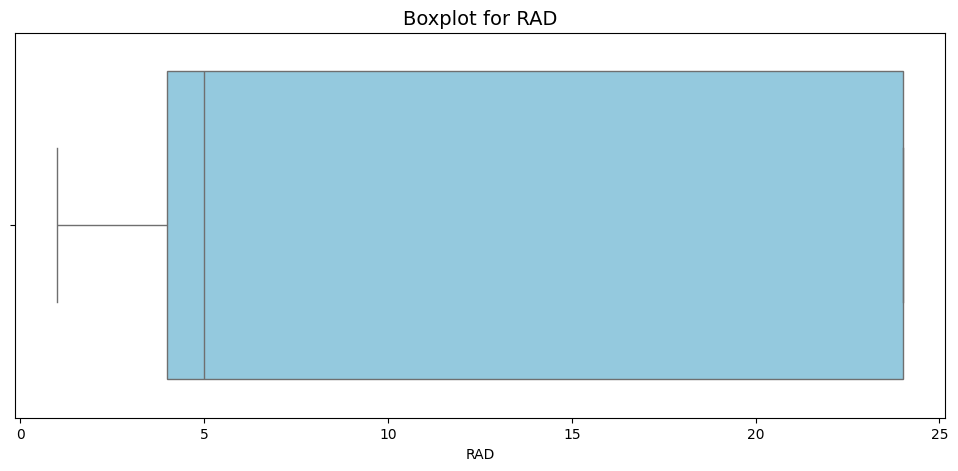

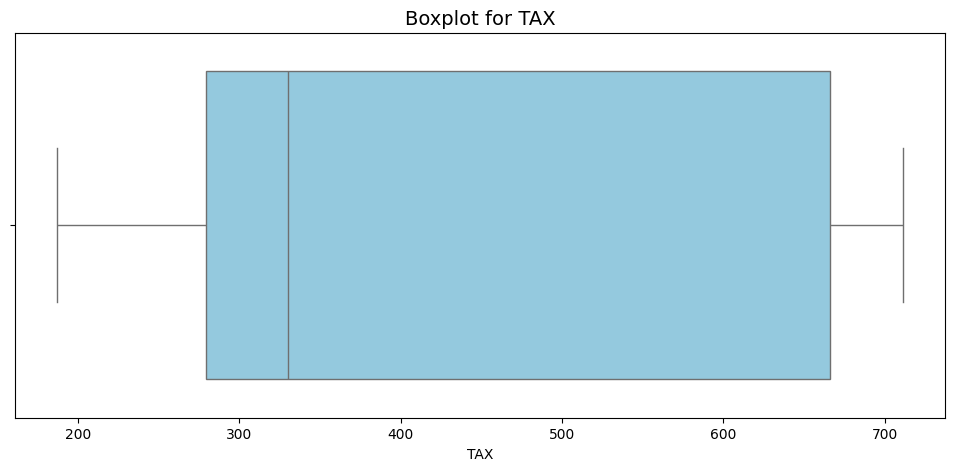

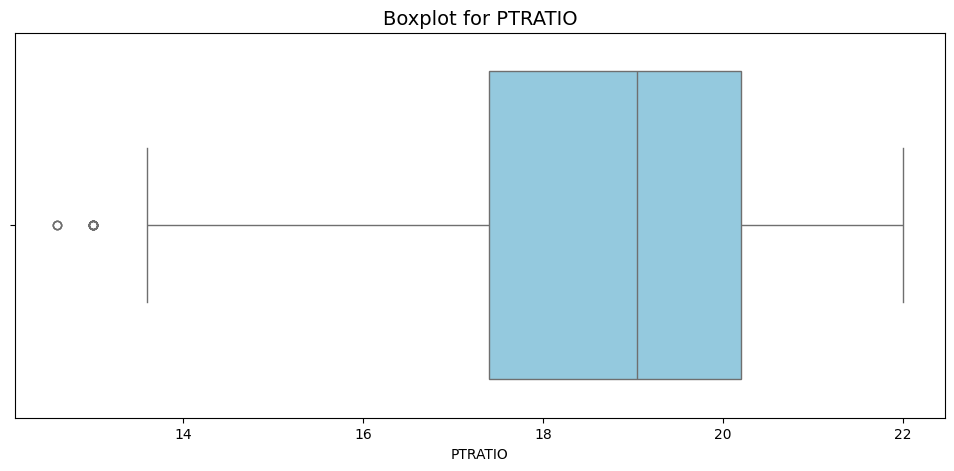

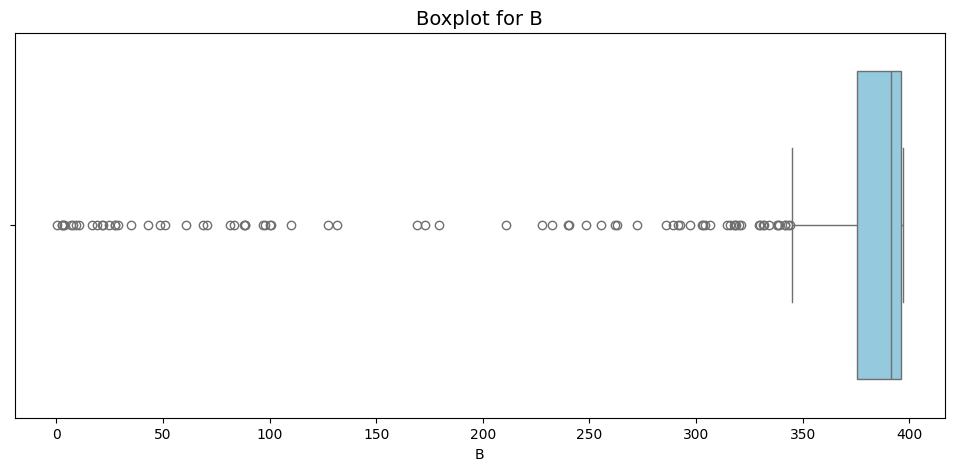

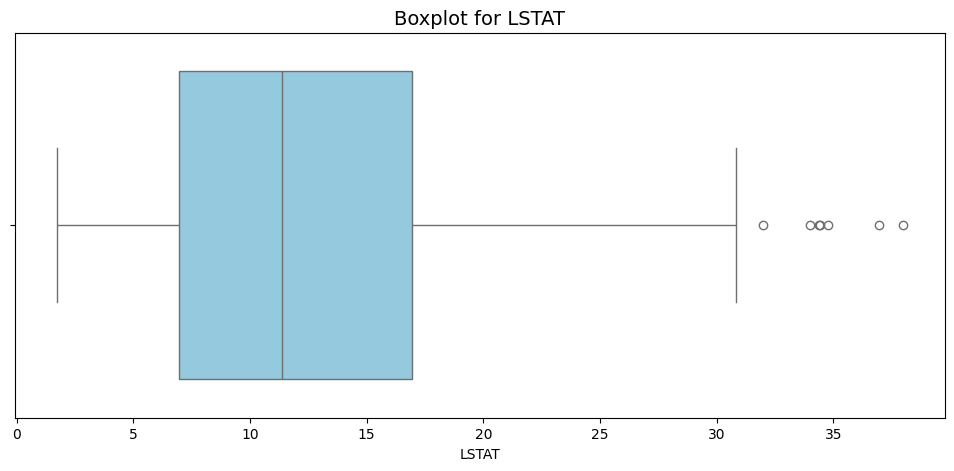

In [9]:
# ------------------------------------------------------------
# 📦 Step 4: Outlier Detection using Boxplots
# ------------------------------------------------------------
# Boxplots help visually identify outliers in numerical features.
# Outliers are data points that lie far from most other observations
# and can distort the performance of machine learning models.
#
# This loop creates a separate boxplot for each independent feature
# (excluding the target variable, which is assumed to be the last column).
# ------------------------------------------------------------

# Loop through each feature (except the last column)
for i in df.columns[:-1]:
    plt.figure(figsize=(12, 5))      # Set figure size for clarity
    sns.boxplot(x=df[i], color='skyblue')  # Draw boxplot for each feature
    plt.title(f"Boxplot for {i}", fontsize=14)
    plt.xlabel(i)
    plt.show()                       # Display the plot


### 🧹 Outlier Treatment
Outliers are capped (clipped) using the 25th and 75th percentiles to reduce their effect on model accuracy.  
This method keeps all data points while preventing extreme values from dominating the regression model.

In [10]:
# ------------------------------------------------------------
# 🧹 Step 5: Outlier Treatment using Quantile Clipping
# ------------------------------------------------------------
# Outliers can negatively impact regression models by skewing results.
# To handle them, we use the 'clip()' method to cap (limit) values:
#   - Lower bound: 25th percentile (Q1)
#   - Upper bound: 75th percentile (Q3)
#
# This ensures that extreme values beyond the interquartile range
# are reduced to more typical values, without removing any data points.
# ------------------------------------------------------------

for i in df.columns[:-1]:  # Exclude target column (last one)
    df[i] = df[i].clip(
        lower=df[i].quantile(0.25),   # Cap values below Q1
        upper=df[i].quantile(0.75)    # Cap values above Q3
    )


### 🎯 Verifying Outlier Treatment
We re-plot boxplots after applying clipping to ensure that the outliers are successfully reduced.  
This helps visually confirm that the data distribution is now cleaner and more consistent.


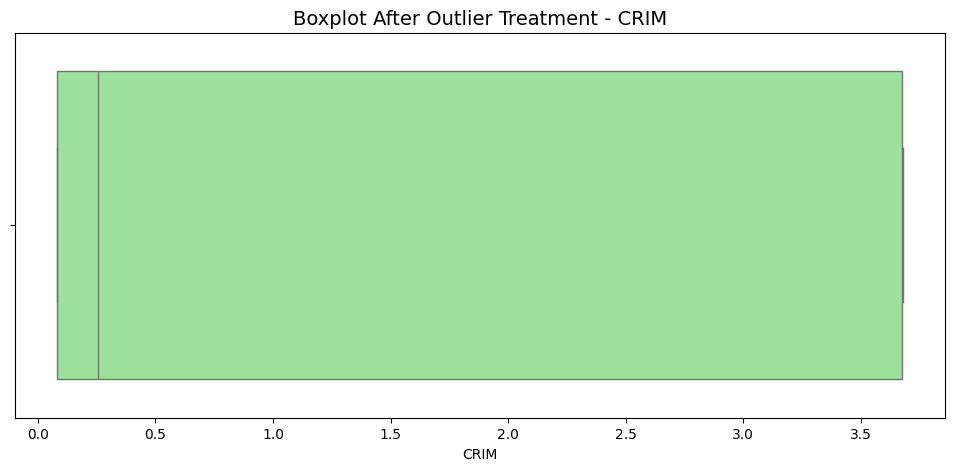

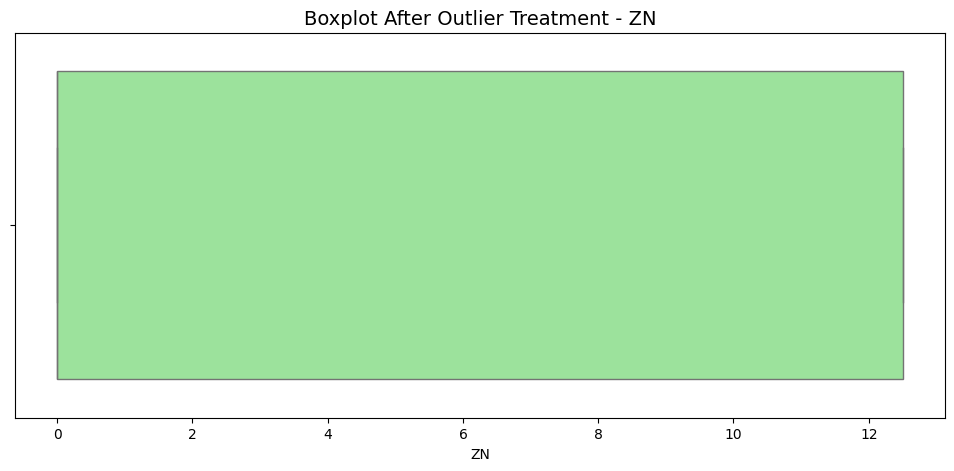

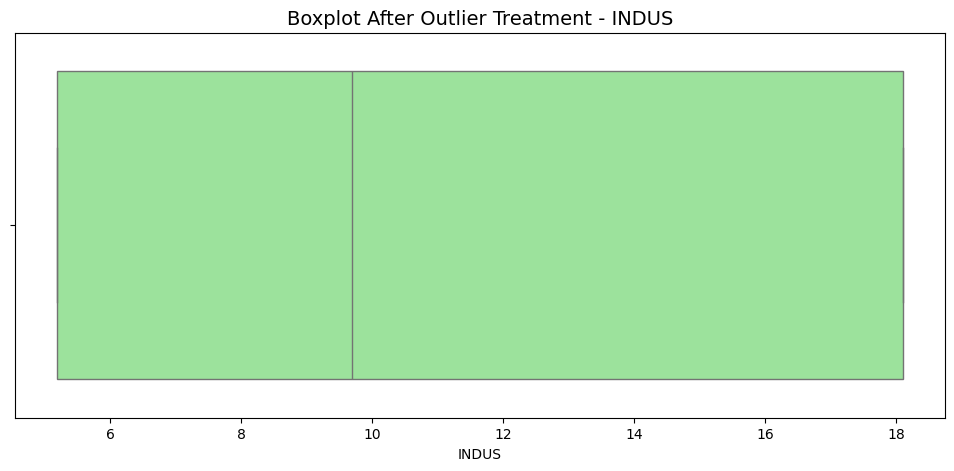

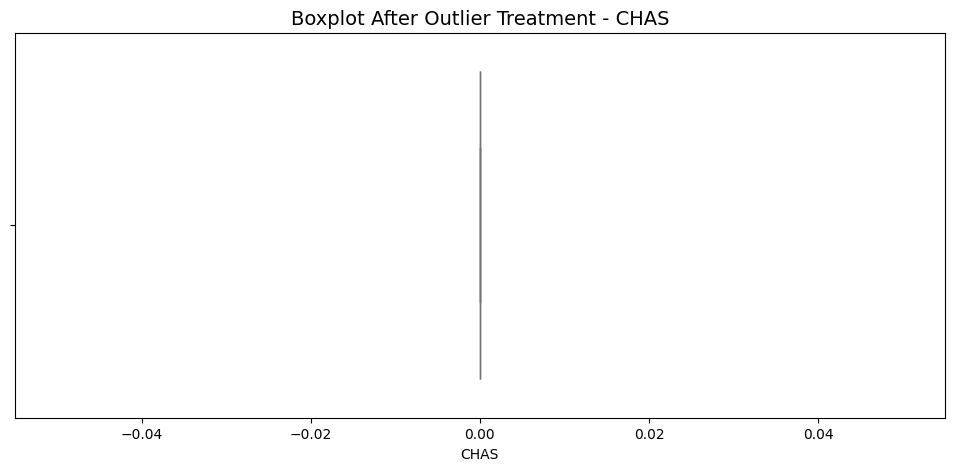

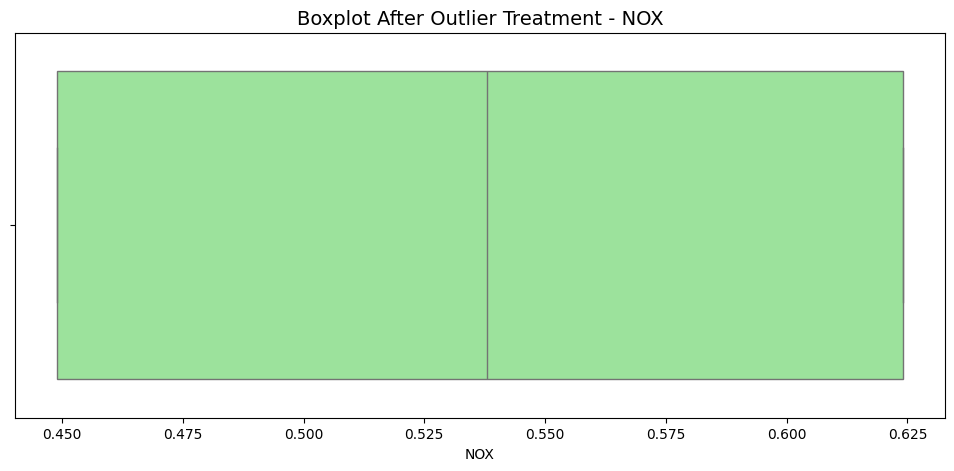

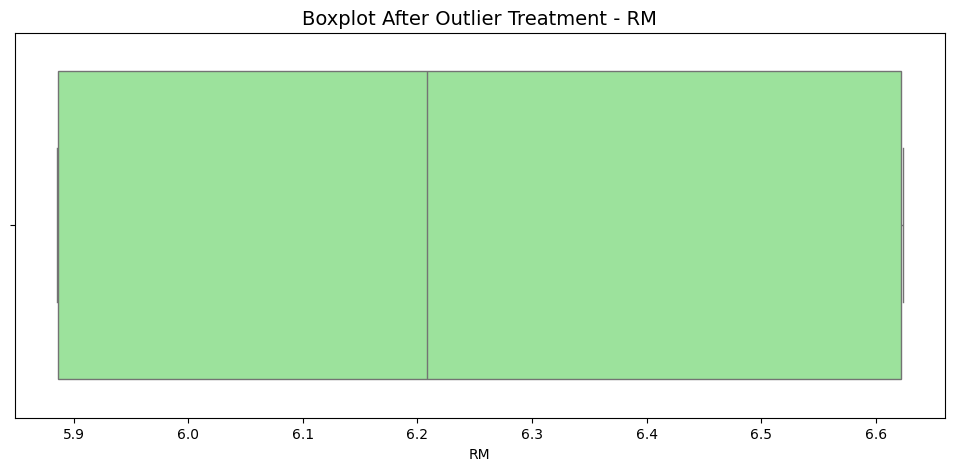

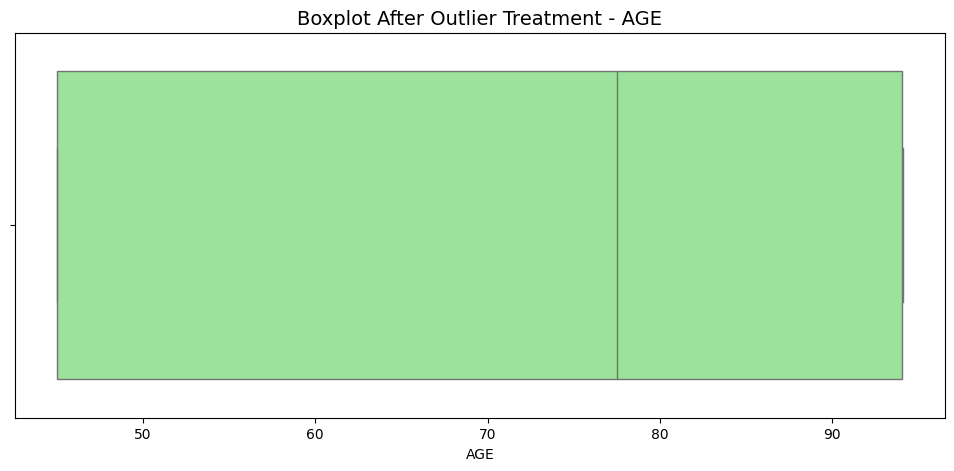

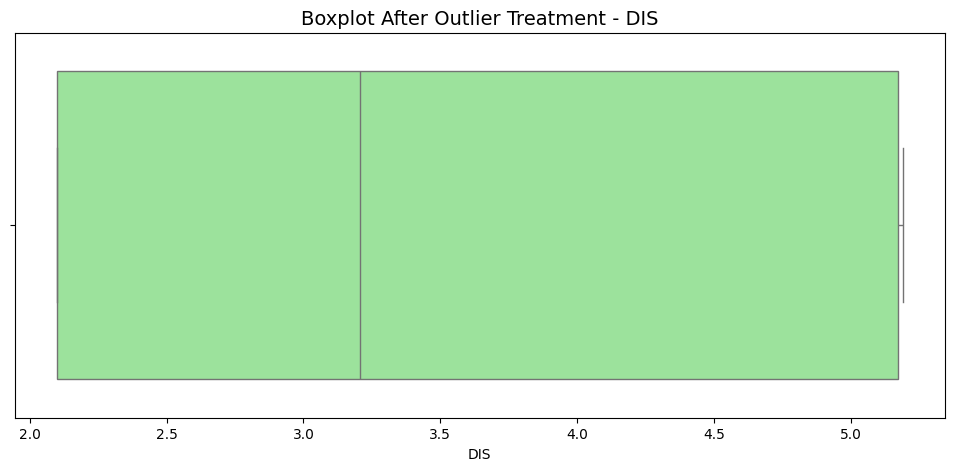

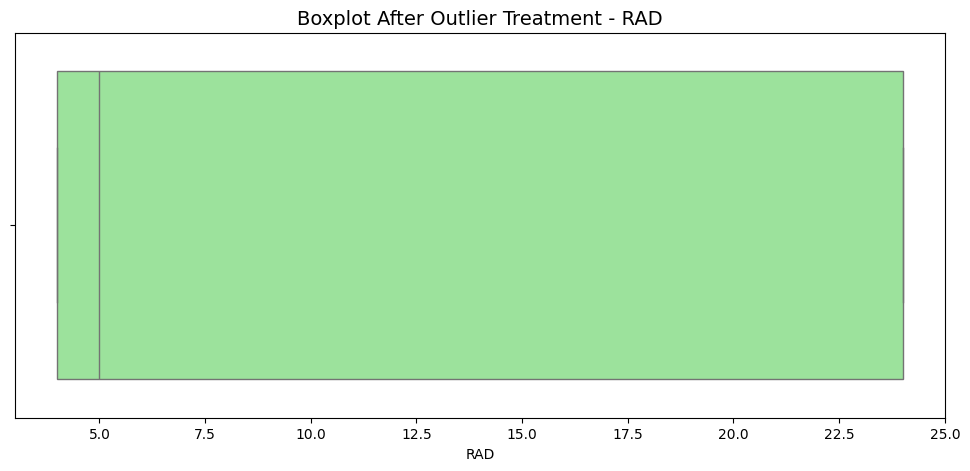

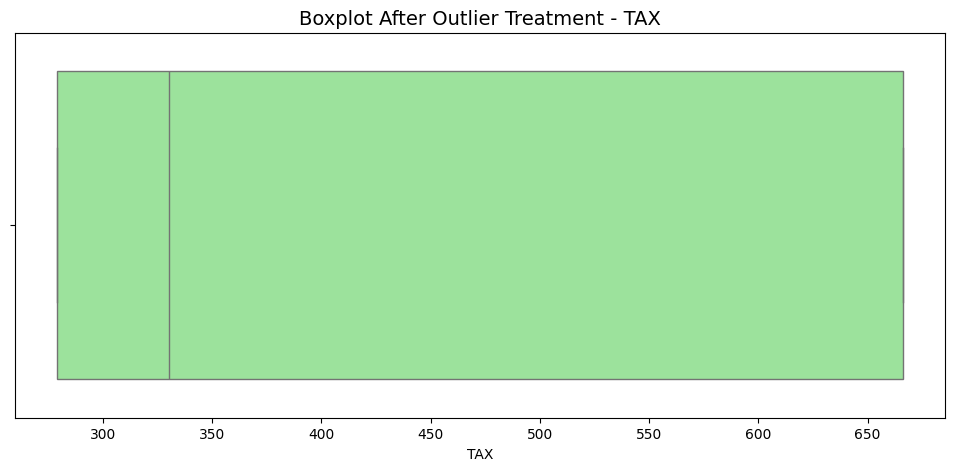

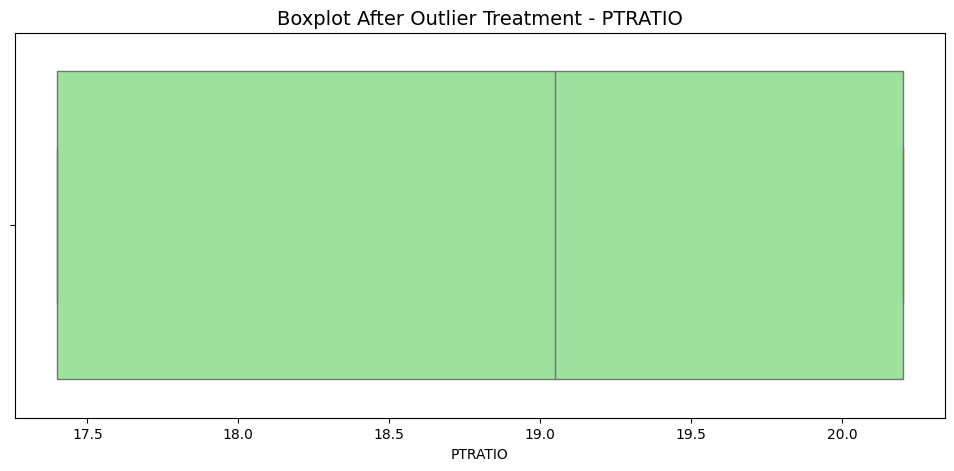

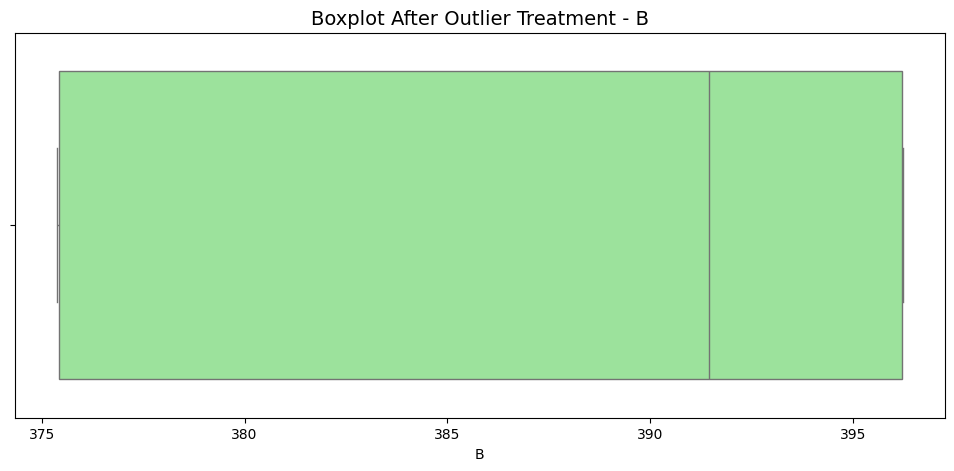

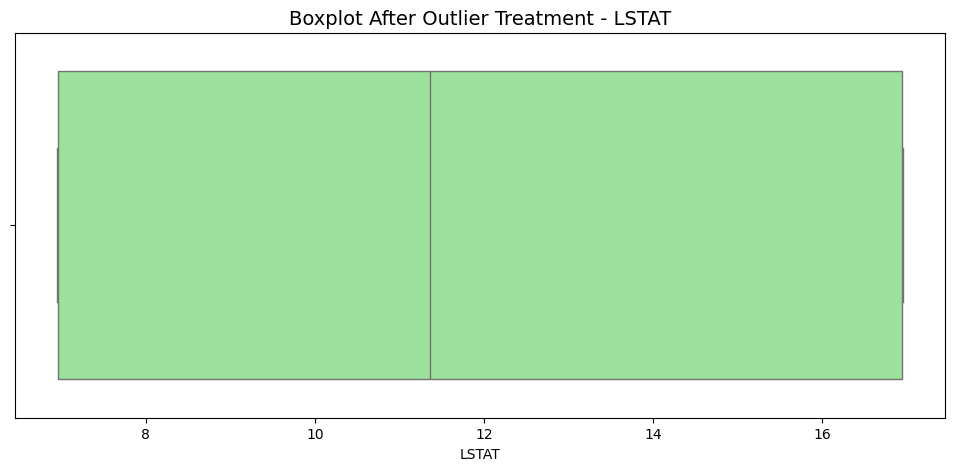

In [11]:
# ------------------------------------------------------------
# 🎯 Step 6: Verify Outlier Treatment
# ------------------------------------------------------------
# After applying clipping, we re-plot boxplots for all features.
# This helps confirm that extreme outliers have been reduced or removed.
# The boxplots should now appear more balanced, with fewer extreme points.
# ------------------------------------------------------------

for i in df.columns[:-1]:  # Exclude the target variable
    plt.figure(figsize=(12, 5))          # Set figure size
    sns.boxplot(x=df[i], color='lightgreen')  # Draw boxplot after clipping
    plt.title(f"Boxplot After Outlier Treatment - {i}", fontsize=14)
    plt.xlabel(i)
    plt.show()                           # Display each plot


### 🧩 Splitting Features and Target
We separate the dataset into input features (`X`) and the output variable (`y`)  
to prepare for model training.


In [12]:
# ------------------------------------------------------------
# 🧩 Step 7: Splitting Features and Target Variable
# ------------------------------------------------------------
# Machine learning models require separating the dataset into:
#   - Independent variables (features) → X
#   - Dependent variable (target) → y
#
# Here:
#   X → All columns except the last one (input features)
#   y → The last column (target / output variable)
# ------------------------------------------------------------

# Define feature set (independent variables)
X = df.iloc[:, :-1]

# Define target variable (dependent variable)
y = df.iloc[:, -1]


### 🔀 Train-Test Split
We divide the data into training (80%) and testing (20%) subsets  
to ensure that the model can be evaluated on unseen data.


In [13]:
# ------------------------------------------------------------
# 🔀 Step 8: Splitting the Data into Training and Testing Sets
# ------------------------------------------------------------
# We split the dataset to evaluate model performance on unseen data.
#   - Training set: Used to train the model
#   - Testing set: Used to evaluate the model's generalization ability
#
# Parameters:
#   test_size=0.2 → 20% data for testing, 80% for training
#   random_state=42 → Ensures reproducibility of the split
# ------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 )


### 🚀 Step 9: Model Initialization & Training
We initialize and train three different regression models:  
**Linear Regression**, **Random Forest**, and **Gradient Boosting**.  

Each model is trained on the same training data for fair comparison.


In [23]:
# ------------------------------------------------------------
# 🚀 Step 9: Model Initialization & Training (Comparison Setup)
# ------------------------------------------------------------
# In this step, we define and train multiple regression models
# to compare their performance on the Boston Housing dataset.
#
# Models Used:
#   1️⃣ Linear Regression     → Simple linear relationship model
#   2️⃣ Random Forest         → Ensemble of decision trees (bagging)
#   3️⃣ Gradient Boosting     → Sequential ensemble (boosting)
#
# All models will later be evaluated using:
#   - R² Score (goodness of fit)
#   - Mean Squared Error (prediction error)
# ------------------------------------------------------------

# Initialize all models in a dictionary for easy iteration
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train each model on the training dataset
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"✅ {name} model trained successfully!")


✅ Linear Regression model trained successfully!
✅ Random Forest model trained successfully!
✅ Gradient Boosting model trained successfully!


### 📊 Making Predictions
We use the trained model to predict house prices for both the training and testing datasets.  
This allows us to compare predicted values with actual values to measure accuracy.


In [24]:
# ------------------------------------------------------------
# 📊 Step 10: Making Predictions for All Models
# ------------------------------------------------------------
# After training, we use each model to predict housing prices
# for both the training and testing datasets.
#
# Purpose:
#   - Evaluate how well each model fits the training data.
#   - Assess generalization performance on unseen (testing) data.
#
# We'll later compare all models using R² and MSE metrics.
# ------------------------------------------------------------

# Dictionary to store all prediction results
predictions = {}

# Generate predictions for each model
for name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Store predictions for evaluation
    predictions[name] = {
        "Train Predictions": y_pred_train,
        "Test Predictions": y_pred_test
    }

    print(f"📈 Predictions generated successfully for {name}")


📈 Predictions generated successfully for Linear Regression
📈 Predictions generated successfully for Random Forest
📈 Predictions generated successfully for Gradient Boosting


### 📈 Step 11: Model Evaluation
We evaluate all models using **R² Score** (goodness of fit) and **Mean Squared Error (MSE)** (error magnitude).  
Results are compared side-by-side for both training and testing datasets.


In [25]:
# ------------------------------------------------------------
# 📈 Step 11: Model Evaluation — R² Score and MSE Comparison
# ------------------------------------------------------------
# Now that we have predictions for all models, we evaluate their
# performance using two key metrics:
#
#   🔹 R² Score (Coefficient of Determination):
#        Measures how well the model explains the variance in data.
#        Range: 0 → 1 (higher is better)
#
#   🔹 Mean Squared Error (MSE):
#        Measures the average squared difference between predicted
#        and actual values. Lower MSE indicates better performance.
#
# We'll calculate both metrics for:
#   - Training data → checks model fit
#   - Testing data  → checks generalization ability
# ------------------------------------------------------------

from sklearn.metrics import r2_score, mean_squared_error

# Initialize dictionary to store evaluation results
evaluation_results = {}

# Evaluate each model
for name, model in models.items():
    y_train_pred = predictions[name]["Train Predictions"]
    y_test_pred = predictions[name]["Test Predictions"]

    # Calculate R² and MSE for both train & test data
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Store results
    evaluation_results[name] = {
        "Train R²": round(r2_train, 4),
        "Test R²": round(r2_test, 4),
        "Train MSE": round(mse_train, 4),
        "Test MSE": round(mse_test, 4)
    }

# Convert dictionary to DataFrame for better display
evaluation_df = pd.DataFrame(evaluation_results).T

# Display results
print("📊 Model Performance Comparison:")
display(evaluation_df)


📊 Model Performance Comparison:


,Train R²,Test R²,Train MSE,Test MSE
Linear Regression,0.6291,0.5928,32.2211,29.8600
Random Forest,0.9629,0.7471,3.2246,18.5460
Gradient Boosting,0.9395,0.7729,5.2591,16.6509


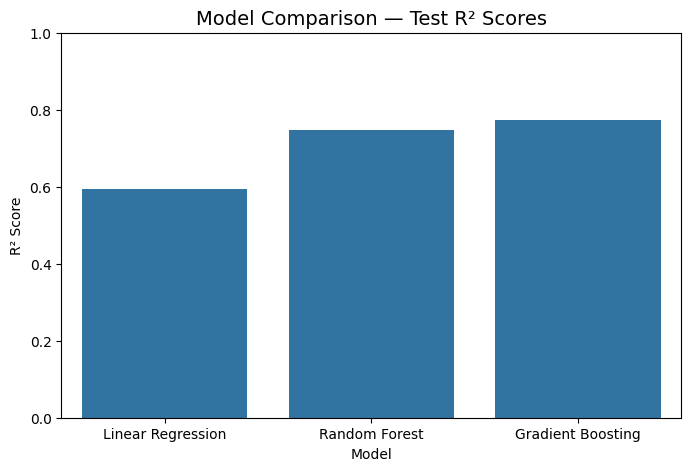

In [26]:
# ------------------------------------------------------------
# 🎯 Step 12: Visualize Model Performance
# ------------------------------------------------------------
# A simple bar chart comparing Test R² Scores across all models.
# ------------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.barplot(x=evaluation_df.index, y=evaluation_df["Test R²"])
plt.title("Model Comparison — Test R² Scores", fontsize=14)
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()


### 💾 Step 13: Saving Trained Models
We save all trained models (`Linear Regression`, `Random Forest`, and `Gradient Boosting`)  
as `.pkl` files for later use in the **Streamlit web app**.  
This avoids retraining and makes deployment much faster.


In [27]:
# ------------------------------------------------------------
# 💾 Step 13: Save All Trained Models using Pickle
# ------------------------------------------------------------
# After training and evaluating multiple models (Linear Regression,
# Random Forest, and Gradient Boosting), we save each one as a .pkl file.
#
# Purpose:
#   ✅ Reuse trained models later for deployment or Streamlit apps
#   ✅ Avoid retraining every time the app runs
#
# The pickle module serializes Python objects and stores them
# in binary format, allowing easy reloading with pickle.load().
# ------------------------------------------------------------

import pickle  # Library for saving and loading Python objects

# Save each trained model separately
for name, model in models.items():
    filename = f"{name.replace(' ', '_')}_BostonHousing.pkl"
    with open(filename, "wb") as f:
        pickle.dump(model, f)
    print(f"✅ {name} model saved successfully as '{filename}'")


✅ Linear Regression model saved successfully as 'Linear_Regression_BostonHousing.pkl'
✅ Random Forest model saved successfully as 'Random_Forest_BostonHousing.pkl'
✅ Gradient Boosting model saved successfully as 'Gradient_Boosting_BostonHousing.pkl'
